In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('..')

from rbm import RBM
from load_data import lire_alpha_digits

# RBM

## Varying number of hidden units - single character

In [3]:
def train_rbm(characters, q, epochs=3000, nb_to_generate=20):
    rbm_model = RBM(X=lire_alpha_digits(characters), q=q, use_adam=True)
    errors = rbm_model.train_RBM(epochs, learning_rate=1e-3, batch_size=32, plot_errors=False, print_error_every=-1)
    _, generated_images = rbm_model.generer_image_RBM(1000, nb_to_generate, plot_=False)
    return rbm_model, generated_images, errors

In [4]:
models = []
images = []
qs = [10, 50, 100, 250, 500]

for q in qs:
    r, i, _= train_rbm(['A'], q)
    models.append(r)
    images.append(i)

100%|██████████| 1000/1000 [00:00<00:00, 1285.97it/s]


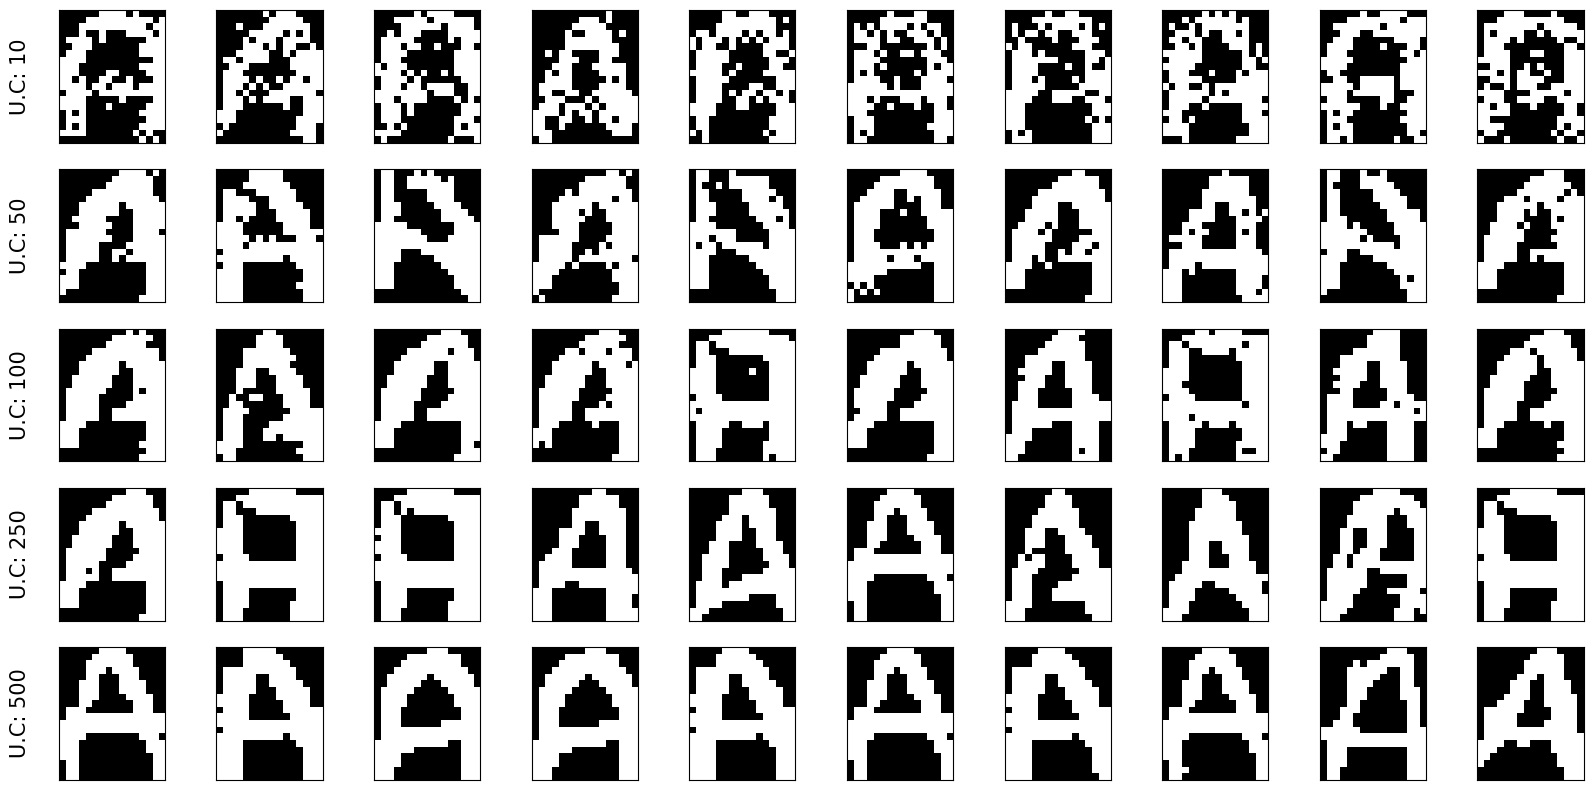

In [5]:
arrays = np.array(images)[:, :10]
fig, axs = plt.subplots(len(qs), 10, figsize=(20, len(qs)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'U.C: {qs[i]}\n', fontsize=15)

#plt.suptitle("Images générées par RBM \n Variation du nombre d'unités cachées")

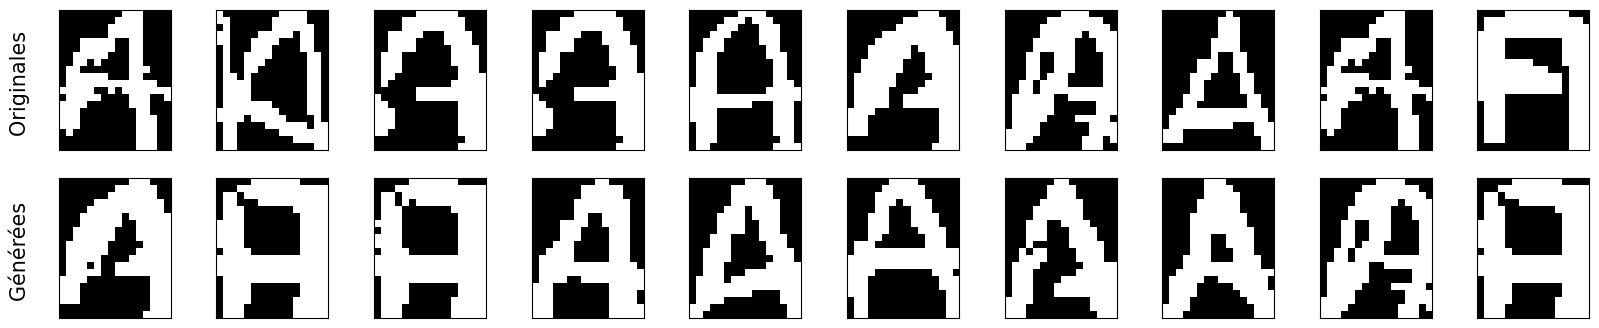

In [6]:
true_im = lire_alpha_digits(['A'])[np.random.choice(39, size=10)]
fig, axs = plt.subplots(2, 10, figsize=(20, 4))

def plot_(arr, i, title):
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(arr[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{title} \n', fontsize=15)

plot_(true_im, 0, 'Originales')
plot_(np.array(images)[3, :10], 1, 'Générées')

## Varying the number of characters

### 250 hidden units

In [7]:
def random_characters(nb):
    ascii_codes_characters = list(range(ord('0'), ord('9')+1)) + list(range(ord('A'), ord('Z')+1))
    ascii_characters = np.random.choice(ascii_codes_characters, replace=False, size=nb)
    characters = [chr(code) for code in ascii_characters]
    return characters

In [8]:
models = []
images = []
errors = []
nb_characters = [1, 2, 4, 6, 8, 16, 24]

for nb_character in nb_characters:
    print(f'Training with {nb_character} characters')
    r, i, e = train_rbm(random_characters(nb_character), 250, epochs=5000, nb_to_generate=200)
    models.append(r)
    images.append(i)
    errors.append(e)

Training with 24 characters


100%|██████████| 1000/1000 [00:02<00:00, 353.71it/s]


In [9]:
for i, error in enumerate(errors):
    print(f'Training with {nb_characters[i]} characters -> stopped training with error = {error[-1]:.4f}')

Training with 1 characters -> stopped training with error = 0.0012
Training with 2 characters -> stopped training with error = 0.0010
Training with 4 characters -> stopped training with error = 0.0006
Training with 6 characters -> stopped training with error = 0.0005
Training with 8 characters -> stopped training with error = 0.0005
Training with 16 characters -> stopped training with error = 0.0006
Training with 24 characters -> stopped training with error = 0.0009


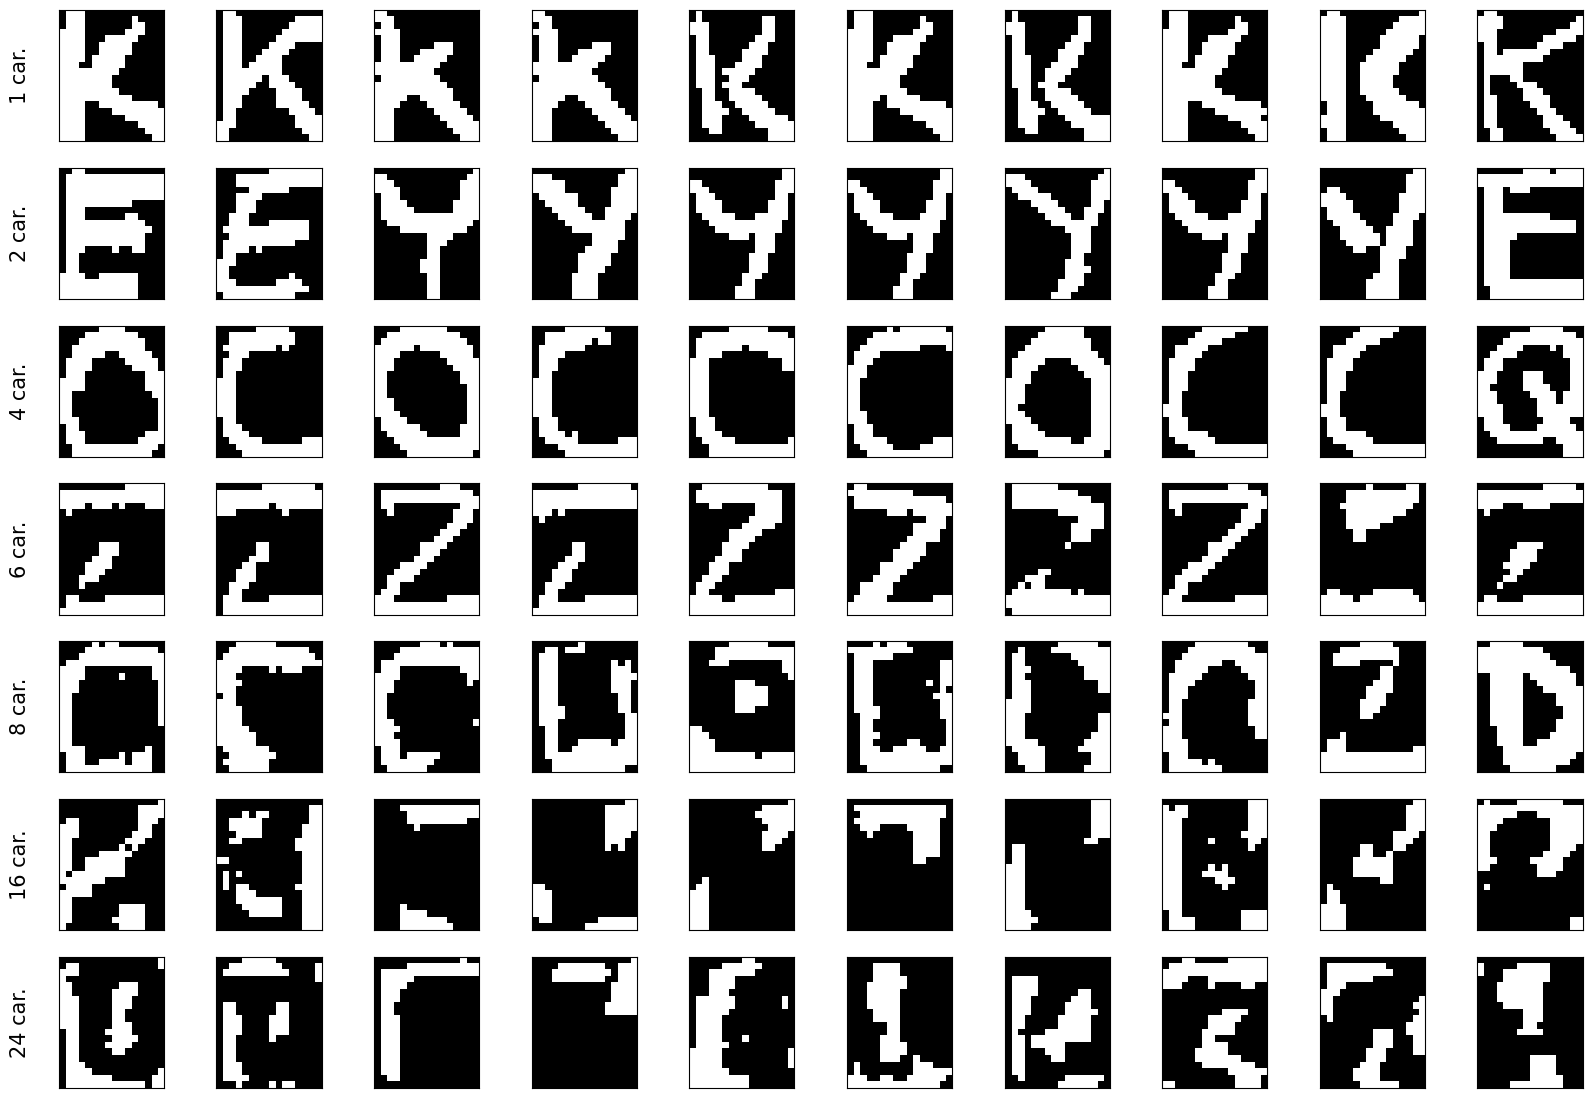

In [10]:
arrays = np.zeros_like(np.array(images)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images[i]), replace=False, size=10)
    arrays[i] = np.array(images)[i, idx]

fig, axs = plt.subplots(len(nb_characters), 10, figsize=(20, len(nb_characters)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{nb_characters[i]} car.\n', fontsize=15)

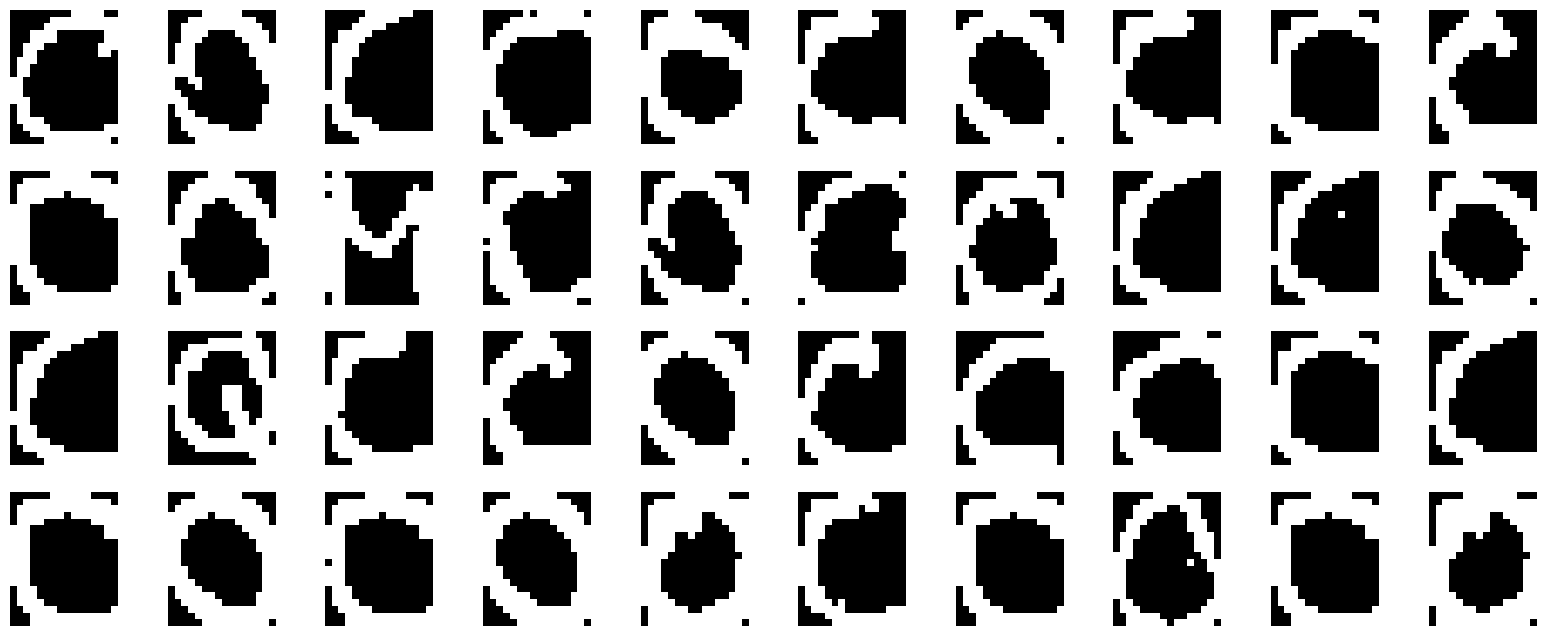

In [45]:
images_4_to_plot = images[2][np.random.choice(len(images[2]), replace=False, size=40)]
fig, axs = plt.subplots(4, 10, figsize=(20, 8))
for i in range(4):
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(images_4_to_plot[10*i+j].reshape(20, 16), cmap='gray')
        ax.axis('off')

### 500 hidden units

In [56]:
def compute_params_rbm(rbm):
    return rbm.a.shape[0] + rbm.b.shape[0] + np.prod(rbm.W.shape)

nb_params_250_hidden_units = compute_params_rbm(RBM(X=lire_alpha_digits(random_characters(36)), q=250))
nb_params_500_hidden_units = compute_params_rbm(RBM(X=lire_alpha_digits(random_characters(36)), q=500))
print(f"nb parameters for RBM with 250 hidden units: {nb_params_250_hidden_units:,}")
print(f"nb parameters for RBM with 500 hidden units: {nb_params_500_hidden_units:,}")

nb parameters for RBM with 250 hidden units: 80,570
nb parameters for RBM with 500 hidden units: 160,820


In [48]:
models_500 = []
images_500 = []
errors_500 = []
nb_characters = [1, 2, 4, 6, 8, 16, 24]

for nb_character in nb_characters:
    print(f'Training with {nb_character} characters')
    r, i, e = train_rbm(random_characters(nb_character), 500, epochs=5000, nb_to_generate=200)
    models_500.append(r)
    images_500.append(i)
    errors_500.append(e)

Training with 24 characters


100%|██████████| 1000/1000 [00:04<00:00, 247.80it/s]


In [50]:
for i, error in enumerate(errors_500):
    print(f'Training with {nb_characters[i]} characters -> stopped training with error = {error[-1]:.4f}')

Training with 1 characters -> stopped training with error = 0.0001
Training with 2 characters -> stopped training with error = 0.0001
Training with 4 characters -> stopped training with error = 0.0001
Training with 6 characters -> stopped training with error = 0.0001
Training with 8 characters -> stopped training with error = 0.0001
Training with 16 characters -> stopped training with error = 0.0001
Training with 24 characters -> stopped training with error = 0.0001


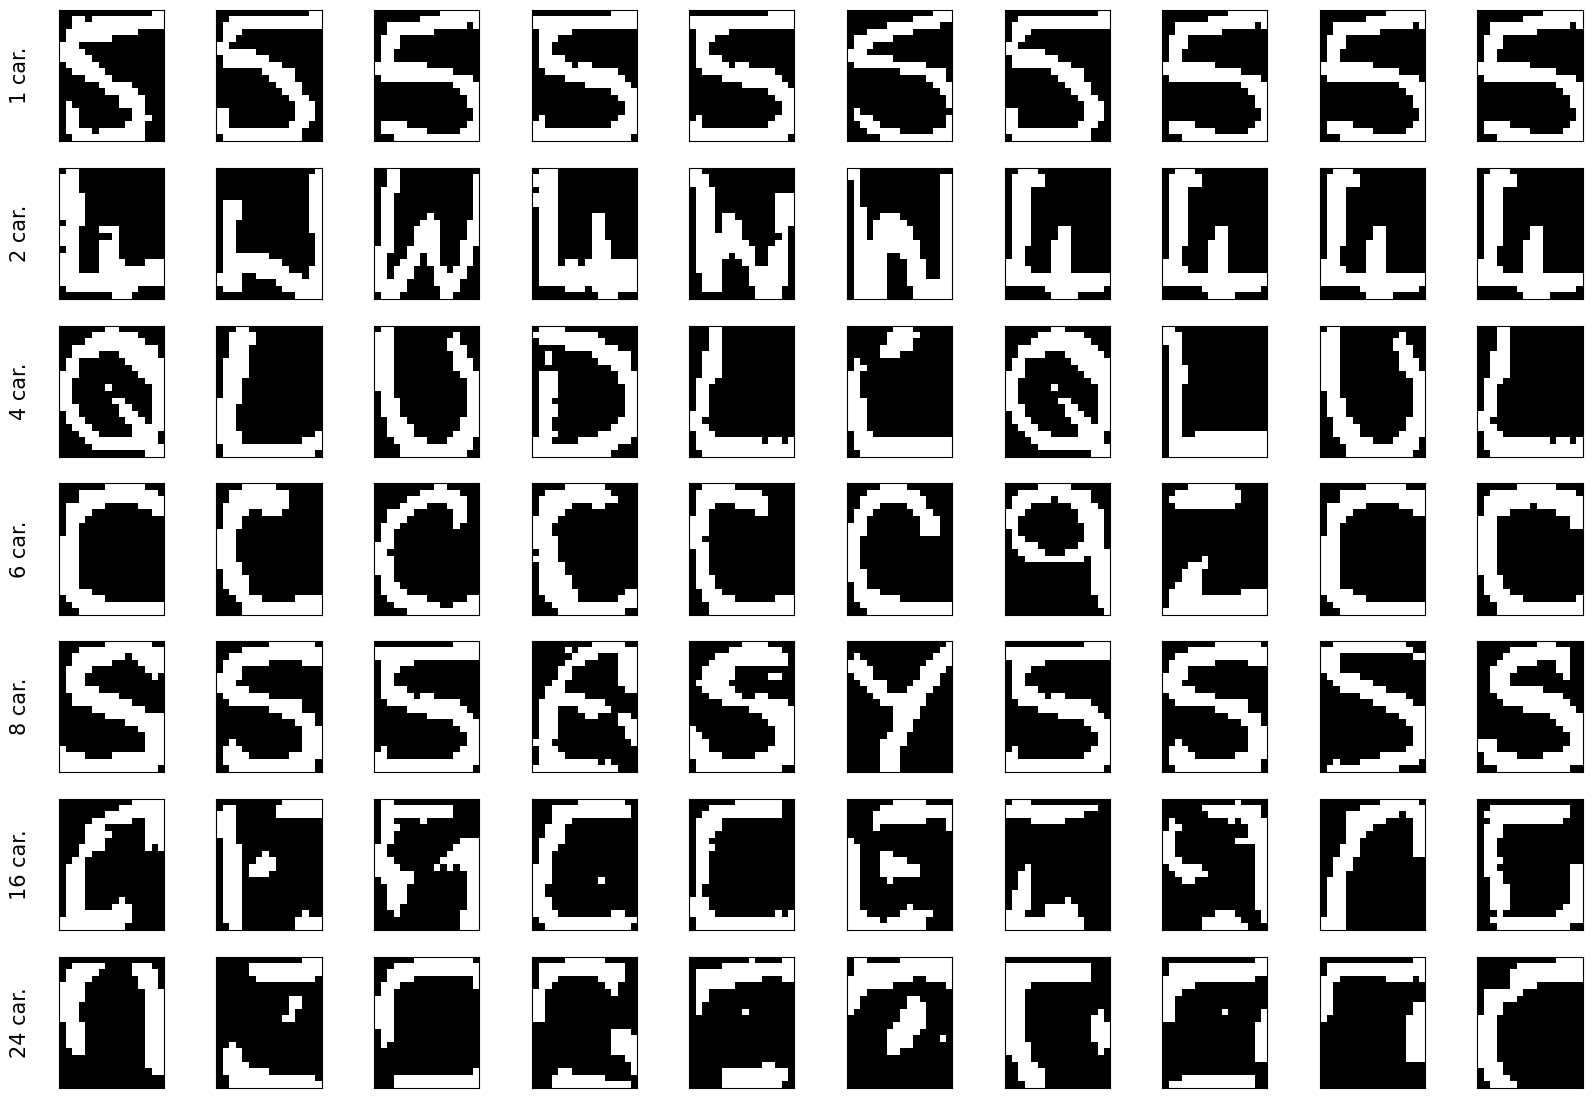

In [60]:
arrays = np.zeros_like(np.array(images_500)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images_500[i]), replace=False, size=10)
    arrays[i] = np.array(images_500)[i, idx]

fig, axs = plt.subplots(len(nb_characters), 10, figsize=(20, len(nb_characters)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{nb_characters[i]} car.\n', fontsize=15)

### 1000 hidden units

In [62]:
def compute_params_rbm(rbm):
    return rbm.a.shape[0] + rbm.b.shape[0] + np.prod(rbm.W.shape)

nb_params_250_hidden_units = compute_params_rbm(RBM(X=lire_alpha_digits(random_characters(36)), q=250))
nb_params_500_hidden_units = compute_params_rbm(RBM(X=lire_alpha_digits(random_characters(36)), q=500))
nb_params_1000_hidden_units = compute_params_rbm(RBM(X=lire_alpha_digits(random_characters(36)), q=1000))
print(f"nb parameters for RBM with 250 hidden units: {nb_params_250_hidden_units:,}")
print(f"nb parameters for RBM with 500 hidden units: {nb_params_500_hidden_units:,}")
print(f"nb parameters for RBM with 1000 hidden units: {nb_params_1000_hidden_units:,}")

nb parameters for RBM with 250 hidden units: 80,570
nb parameters for RBM with 500 hidden units: 160,820
nb parameters for RBM with 1000 hidden units: 321,320


In [63]:
models_1000 = []
images_1000 = []
errors_1000 = []
nb_characters = [1, 2, 4, 6, 8, 16, 24]

for nb_character in nb_characters:
    print(f'Training with {nb_character} characters')
    r, i, e = train_rbm(random_characters(nb_character), 1000, epochs=5000, nb_to_generate=200)
    models_1000.append(r)
    images_1000.append(i)
    errors_1000.append(e)

Training with 2 characters


In [ ]:
for i, error in enumerate(errors_1000):
    print(f'Training with {nb_characters[i]} characters -> stopped training with error = {error[-1]:.4f}')

Training with 1 characters -> stopped training with error = 0.0001
Training with 2 characters -> stopped training with error = 0.0001
Training with 4 characters -> stopped training with error = 0.0001
Training with 6 characters -> stopped training with error = 0.0001
Training with 8 characters -> stopped training with error = 0.0001
Training with 16 characters -> stopped training with error = 0.0001
Training with 24 characters -> stopped training with error = 0.0001


In [ ]:
arrays = np.zeros_like(np.array(images_1000)[:, :10])
for i, arr in enumerate(arrays):
    idx = np.random.choice(len(images_1000[i]), replace=False, size=10)
    arrays[i] = np.array(images_1000)[i, idx]

fig, axs = plt.subplots(len(nb_characters), 10, figsize=(20, len(nb_characters)*2)) 

for i, array in enumerate(arrays):
    for j in range(10): 
        ax = axs[i, j] 
        ax.imshow(array[j].reshape(20, 16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'{nb_characters[i]} car.\n', fontsize=15)